**验证、说明rpart算法倾向于选择类别取值多的特征**

In [1]:
options(warn=-1)    #忽略一切警告
options('width'=140)  #充分利用打印宽度
options(repr.plot.width=15, repr.plot.height=10)  #满幅

library(pacman)
p_load(rpart)
p_load(skimr)
s <- skim_tee

In [2]:
n <- 1000 # number of experiment
p1 <- p2 <- p3 <- p4 <- p5 <- p6 <- c()
sp2 <- sp3 <- sp4 <- sp5 <- sp6 <- c()

pb <- txtProgressBar(style = 3)
# x1~6,y are independent of each other ,x与y相等
for (i in 1:n) {
  set.seed(i + n + 1)
  x1 <- factor((sample(500) %% 2)) # 2种取值
  set.seed(i + n + 2)
  x2 <- factor((sample(500) %% 10)) # 10种取值
  set.seed(i + n + 3)
  x3 <- factor((sample(500) %% 20)) # 20种取值
  set.seed(i + n + 4)
  x4 <- factor((sample(500) %% 50)) # 50种取值
  set.seed(i + n + 5)
  x5 <- factor((sample(500) %% 100)) # 100种取值
  set.seed(i + n + 6)
  x6 <- factor((sample(500) %% 250)) # 500种取值
  set.seed(i + n)
  y <- factor((sample(500) %% 2))


  # 独立性假设检验
  p1 <- c(p1, chisq.test(table(x1, y), simulate.p.value = TRUE)$p.value)
  p2 <- c(p2, chisq.test(table(x2, y), simulate.p.value = TRUE)$p.value)
  p3 <- c(p3, chisq.test(table(x3, y), simulate.p.value = TRUE)$p.value)
  p4 <- c(p4, chisq.test(table(x4, y), simulate.p.value = TRUE)$p.value)
  p5 <- c(p5, chisq.test(table(x5, y), simulate.p.value = TRUE)$p.value)
  p6 <- c(p6, chisq.test(table(x6, y), simulate.p.value = TRUE)$p.value)

  dt2 <- data.frame(x1, x2, y)
  dt3 <- data.frame(x1, x2, x3, y)
  dt4 <- data.frame(x1, x2, x3, x4, y)
  dt5 <- data.frame(x1, x2, x3, x4, x5, y)
  dt6 <- data.frame(x1, x2, x3, x4, x5, x6, y)

  crt2 <- rpart(y ~ ., data = dt2, method = "class", cp = 0)
  crt3 <- rpart(y ~ ., data = dt3, method = "class", cp = 0)
  crt4 <- rpart(y ~ ., data = dt4, method = "class", cp = 0)
  crt5 <- rpart(y ~ ., data = dt5, method = "class", cp = 0)
  crt6 <- rpart(y ~ ., data = dt6, method = "class", cp = 0)

  sp2 <- c(sp2, rownames(crt2$splits)[1]) # rpart树的首选分枝特征
  sp3 <- c(sp3, rownames(crt3$splits)[1]) # rpart树的首选分枝特征
  sp4 <- c(sp4, rownames(crt4$splits)[1]) # rpart树的首选分枝特征
  sp5 <- c(sp5, rownames(crt5$splits)[1]) # rpart树的首选分枝特征
  sp6 <- c(sp6, rownames(crt6$splits)[1]) # rpart树的首选分枝特征

  setTxtProgressBar(pb, i / n)
}
cat("\n")
s(dt6)

  |==================================================================================================================================| 100%
── Data Summary ────────────────────────
                           Values
Name                       data  
Number of rows             500   
Number of columns          7     
_______________________          
Column type frequency:           
  factor                   7     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts                
1 x1                    0             1 FALSE          2 0: 250, 1: 250            
2 x2                    0             1 FALSE         10 0: 50, 1: 50, 2: 50, 3: 50
3 x3                    0             1 FALSE         20 0: 25, 1: 25, 2: 25, 3: 25
4 x4                    0          

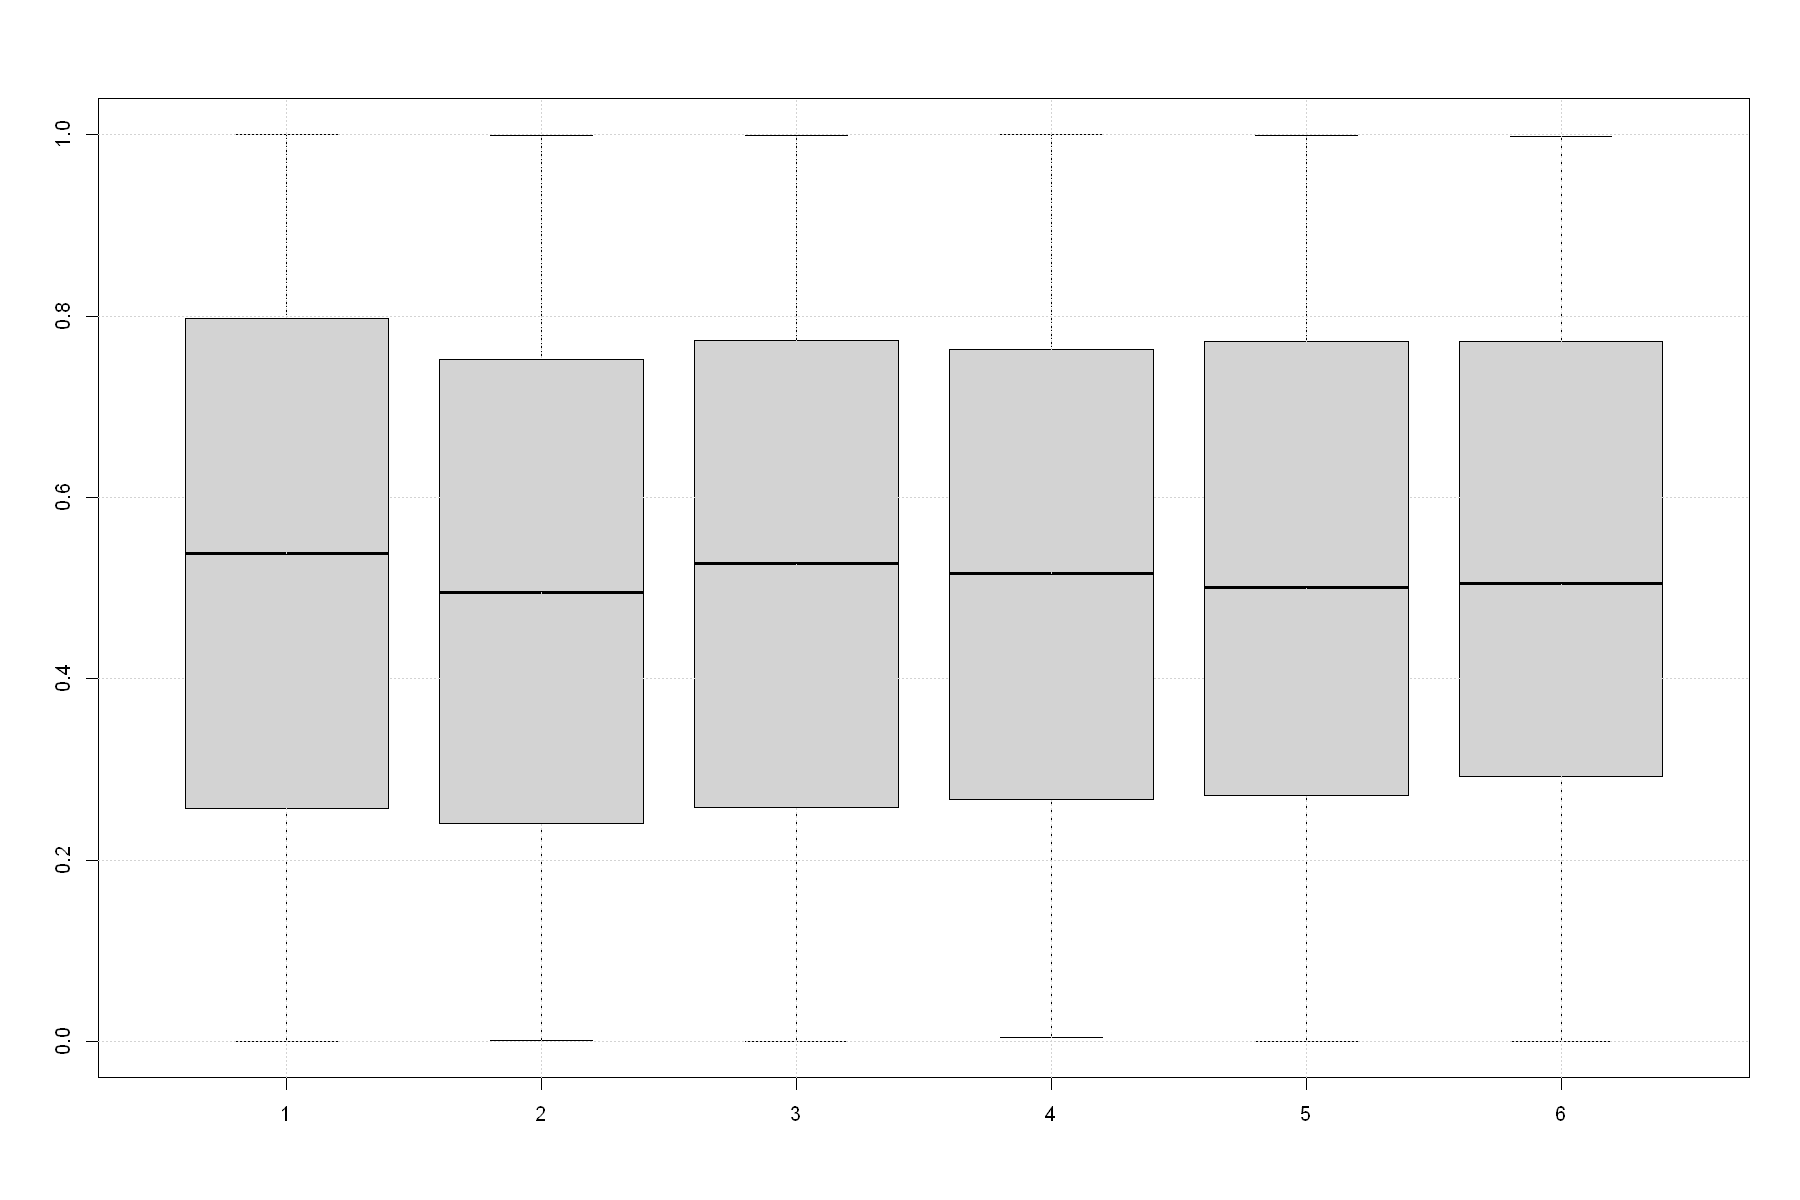

In [3]:
boxplot(p1, p2, p3, p4, p5, p6) 
grid()
# 可见x1~x6的p值都较大,不能拒绝x1~x6与y独立

In [4]:
# rpart选中作为根节点分枝的属性的次数
addmargins(table(sp2)) 
addmargins(table(sp3)) 
addmargins(table(sp4)) 
addmargins(table(sp5)) 
addmargins(table(sp6)) 
#rpart倾向于选择了取值数最大的特征

sp2
  x1   x2  Sum 
  35  965 1000 

sp3
  x1   x2   x3  Sum 
   1  116  883 1000 

sp4
  x3   x4  Sum 
   6  994 1000 

sp5
  x4   x5  Sum 
   1  999 1000 

sp6
  x6  Sum 
1000 1000 